<a href="https://colab.research.google.com/github/2022yingjie/Machine_Learning-xitutu/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 基本概念
> 主成分分析（Principal Component Analysis，PCA）一种最常用的数据降维
方法，使得数据在转换后的空间中的方差最大。因为，选择数据方差最大的方向进行投影，才能最大化数据的差异性，保留更多的原始数据信息。

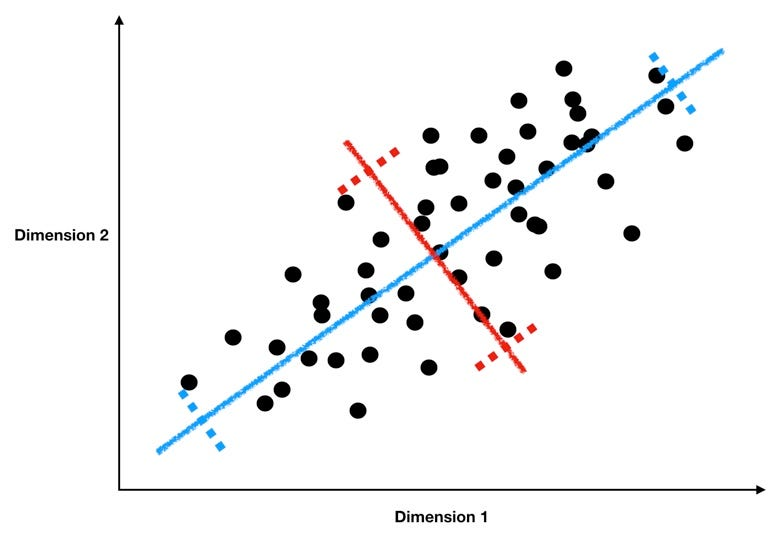
# 2. 数学推导
> 假设有一组$d$维数据$x^{(n)}, 1<n<N$, 将其投影到低维空间，投影向量为$w∈R^{d}$。每个样本点$x^{(n)}$投影之后的表示为：$$z^{(n)}=w^{T}x^{(n)}$$

>用矩阵$X=[x^{(1)},x^{(2)},...,x^{(n)}]$表示输入样本，原始样本中心点表示为$\bar{x}=\frac{1}{N}\sum_{n=1}^{N}x^{(n)}$为原始样本的中心点。投影后的方差表示为
\begin{equation}
\begin{split}
σ(X;w )&=\frac{1}{N}\sum_{n=1}^{N}(w^{T}x^{(n)}-w^{T}\bar{x})^{2}\\
&=\frac{1}{N}(w^{T}X-w^{T}\bar{X})(w^{T}X-w^{T}\bar{X})^{T}\\
&=w^{T}Sw
\end{split}
\end{equation}

> 其中$S=\frac{1}{N}(X-\bar{X})(X-\bar{X})^{T}$是原始数据的协方差矩阵，$w$满足$w^{T}w=1$,利用拉格朗日方法转化为无约束优化问题，$$max(w^{T}Sw+λ(1-w^{T}w))$$,对上式$w$求导，可得$$Sw=λw$$,可知$w$是协方差$S$的特征向量，$λ$为特征值，也是投影后样本在各个维度上的方差。

> 因此，PCA可以转换成一个矩阵特征值分解问题，投影向量$w$为矩阵$S$的最大特征对应的特征向量。

> 策略：通过投影矩阵$W∈R^{d\times{d^{'}}}$将样本投到$d^{'}$维空间，投影矩阵满足$W^{T}W=I$，只要将S的特征值从大到小排列，保留前$d^{'}$个特征向量，其对应的特征向量即是最优的投影矩阵。

# 总结
主成分分析是一种无监督学习方法，可以作为监督学习的数据预处理方法，用来去除噪声并减少特征之间的相关性。但它并不能保证投影后数据类别的可分性更好。


In [2]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)# n_component: target dimension
pca.fit(X)
print(pca.explained_variance_ratio_)# influence ratio of each dimension
print(pca.singular_values_)# feature value
pca = PCA(n_components=1)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]
[0.99244289]
[6.30061232]
